In [15]:
# Various NLP preprocessing tasks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
import spacy

from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.wsd import lesk
from nltk.chunk import ne_chunk
from nltk.tree import Tree


# Download required NLTK resources
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/bryanlim/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/bryanlim/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/bryanlim/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/bryanlim/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/bryanlim/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_da

True

In [16]:
# Remove the HTML tag
df = pd.read_csv('IMDB Dataset.csv')[['review']]
df['html_review'] = df['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

print(df[['review','html_review' ]].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                         html_review  
0  One of the other reviewers has mentioned that ...  
1  A wonderful little production. The filming tec...  
2  I thought this was a wonderful way to spend ti...  
3  Basically there's a family where a little boy ...  
4  Petter Mattei's "Love in the Time of Money" is...  


In [17]:
# Remove punctuation and numbers
df['num_review'] = df['html_review'].apply(lambda x: re.sub("[^a-zA-Z.]", " ", x))
#df['num_review'] = df['html_review'].apply(lambda x: re.sub("[^a-zA-Z.]", " ", x)) not removing .

print("Original Review:\n", df['html_review'].iloc[0])
print("\nCleaned (No punctuation/numbers):\n", df['num_review'].iloc[0])

Original Review:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes whe

In [18]:
# to lowercase to ensure uniformity and to facilitate case-insensitive comparisons.
df['low_review'] = df['num_review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text().lower())
print(df['low_review'].iloc[0])

one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked. they are right  as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go. trust me  this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs  sex or violence. its is hardcore  in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda. em city is home to many..aryans  muslims  gangstas  latinos  christians  italians  irish and more....so scuffles  death stares  dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wou

In [19]:
# Sentence Segmentation
df['sentences'] = df['low_review'].apply(lambda x: sent_tokenize(x))
print(df['sentences'].iloc[0])

['one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked.', 'they are right  as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go.', 'trust me  this is not a show for the faint hearted or timid.', 'this show pulls no punches with regards to drugs  sex or violence.', 'its is hardcore  in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary.', 'it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda.', 'em city is home to many..aryans  muslims  gangstas  latinos  christians  italians  irish and more....so scuffles  death stares  dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes w

In [20]:
# Tokenization
df['tokens'] = df['sentences'].apply(lambda x: word_tokenize(" ".join(x)))
print(df['tokens'].iloc[0])

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'll', 'be', 'hooked', '.', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', '.', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', '.', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all',

In [21]:
# Stop Word Removal
stop_words = set(stopwords.words('english'))

df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: [t for t in x if t not in stop_words and t not in string.punctuation])

print(df['tokens_no_stopwords'].iloc[0])

['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'me.the', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word.it', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', '..', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', '....', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away.i', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream', 'audien

In [22]:
# Stemming
stemmer = PorterStemmer()
df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(lambda tokens: [stemmer.stem(t) for t in tokens])
print(df['stemmed_tokens'].iloc[0])

['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'right', 'exactli', 'happen', 'me.th', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'hardcor', 'classic', 'use', 'word.it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', '..', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', '....', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.i', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm', 'forget', 'romanc', '...', 'oz', 'mess', 

In [23]:
# Part-of-Speech Tagging
df['pos_tags'] = df['tokens_no_stopwords'].apply(pos_tag)
print(df['pos_tags'].iloc[0])

[('one', 'CD'), ('reviewers', 'NNS'), ('mentioned', 'VBD'), ('watching', 'VBG'), ('oz', 'JJ'), ('episode', 'NN'), ('hooked', 'VBD'), ('right', 'RB'), ('exactly', 'RB'), ('happened', 'VBD'), ('me.the', 'NNS'), ('first', 'JJ'), ('thing', 'NN'), ('struck', 'VBD'), ('oz', 'JJ'), ('brutality', 'NN'), ('unflinching', 'VBG'), ('scenes', 'NNS'), ('violence', 'NN'), ('set', 'VBN'), ('right', 'RB'), ('word', 'NN'), ('go', 'VB'), ('trust', 'NN'), ('show', 'NN'), ('faint', 'NN'), ('hearted', 'VBD'), ('timid', 'JJ'), ('show', 'NN'), ('pulls', 'VBZ'), ('punches', 'NNS'), ('regards', 'NNS'), ('drugs', 'NNS'), ('sex', 'NN'), ('violence', 'NN'), ('hardcore', 'NN'), ('classic', 'JJ'), ('use', 'NN'), ('word.it', 'NN'), ('called', 'VBN'), ('oz', 'NN'), ('nickname', 'NN'), ('given', 'VBN'), ('oswald', 'JJ'), ('maximum', 'JJ'), ('security', 'NN'), ('state', 'NN'), ('penitentary', 'JJ'), ('focuses', 'NNS'), ('mainly', 'RB'), ('emerald', 'VBP'), ('city', 'NN'), ('experimental', 'JJ'), ('section', 'NN'), ('pri

In [24]:
# Word Sense Disambiguation
target_word = 'movie'

# Apply Lesk WSD across all reviews
df[f'{target_word}_sense'] = df['tokens_no_stopwords'].apply(
    lambda tokens: lesk(tokens, target_word).definition() if target_word in tokens and lesk(tokens, target_word) else 'No sense'
)

# Example output
print(df[[f'{target_word}_sense']].head())

                                         movie_sense
0                                           No sense
1                                           No sense
2                                           No sense
3  a form of entertainment that enacts a story by...
4  a form of entertainment that enacts a story by...


In [25]:
# Named Entity Recognition
nlp = spacy.load('en_core_web_sm')

# NER using spacy
def spacy_ner(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['named_entities'] = df['html_review'].apply(spacy_ner)
print(df['named_entities'].iloc[0])

[('One', 'CARDINAL'), ('1', 'CARDINAL'), ('first', 'ORDINAL'), ('GO', 'ORG'), ('OZ', 'ORG'), ('the Oswald Maximum Security State Penitentary', 'ORG'), ('Emerald City', 'GPE'), ('Em City', 'GPE'), ('Aryans', 'NORP'), ('Muslims', 'NORP'), ('Latinos', 'ORG'), ('Christians', 'NORP'), ('Italians', 'NORP'), ('Irish', 'NORP'), ('first', 'ORDINAL')]


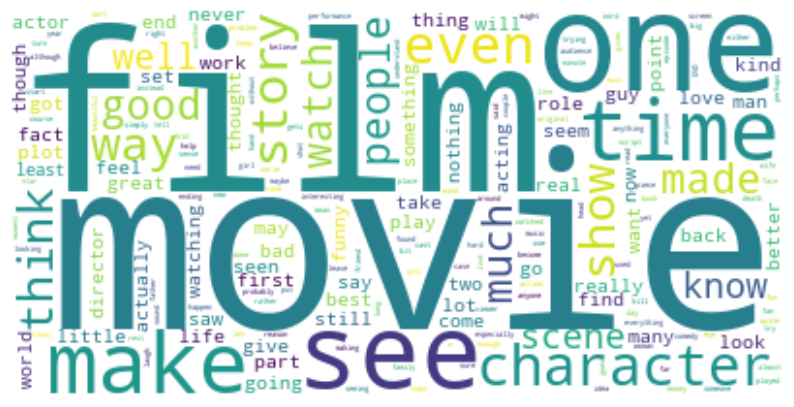

In [26]:
# WordCloud
text = " ".join(review for review in df['html_review'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# Tuto 5&6
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn

In [28]:
# Initialize analyzers
vader_analyzer = SentimentIntensityAnalyzer()
afinn_analyzer = Afinn()

# TextBlob Sentiment Analysis
# Ranges from -1 (very negative) to +1 (very positive)
df['textblob_polarity'] = df['html_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Ranges from 0 (objective) to 1 (subjective)
df['textblob_subjectivity'] = df['html_review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# VADER Sentiment Analysis
# Proportions of negative, neutral, and positive sentiment
# Normalized score from -1 to +1 summarizing the sentiment
vader_scores = df['html_review'].apply(lambda x: vader_analyzer.polarity_scores(x))
df['vader_neg'] = vader_scores.apply(lambda x: x['neg'])
df['vader_neu'] = vader_scores.apply(lambda x: x['neu'])
df['vader_pos'] = vader_scores.apply(lambda x: x['pos'])
df['vader_compound'] = vader_scores.apply(lambda x: x['compound'])

# AFINN Sentiment Analysis (A total sentiment score (sum of term scores). More positive = more positive sentiment)
df['afinn_score'] = df['html_review'].apply(lambda x: afinn_analyzer.score(x))

                                         html_review  textblob_polarity  \
0  One of the other reviewers has mentioned that ...           0.023433   
1  A wonderful little production. The filming tec...           0.109722   
2  I thought this was a wonderful way to spend ti...           0.354008   
3  Basically there's a family where a little boy ...          -0.057813   
4  Petter Mattei's "Love in the Time of Money" is...           0.217952   

   vader_compound  afinn_score  
0         -0.9916        -40.0  
1          0.9670         13.0  
2          0.9519         21.0  
3         -0.9213         -8.0  
4          0.9744         28.0  


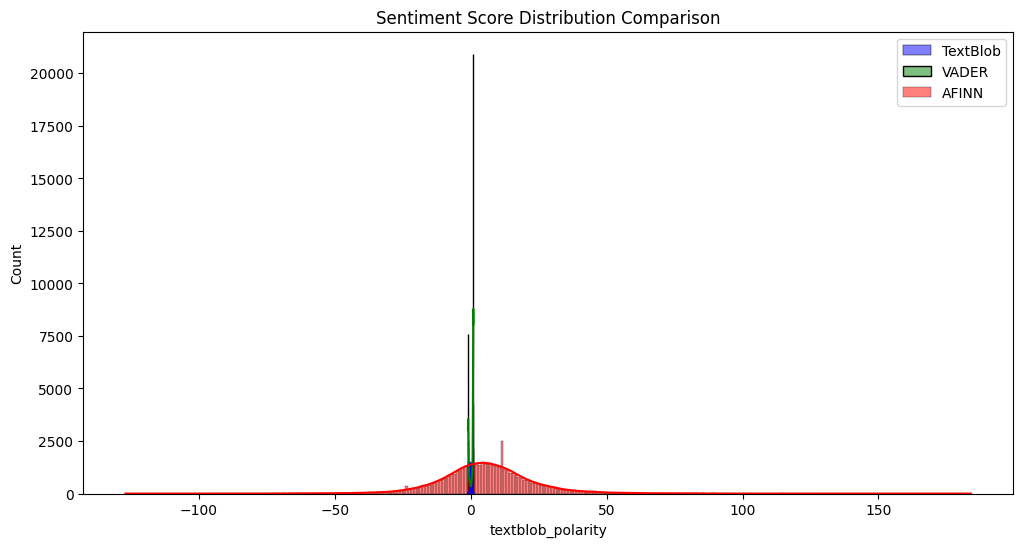

In [29]:
# View the textblob_polarity, vader_compound, afinn_score
print(df[['html_review', 'textblob_polarity', 'vader_compound', 'afinn_score']].head())
# Compare sentiment distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['textblob_polarity'], color='blue', label='TextBlob', kde=True)
sns.histplot(df['vader_compound'], color='green', label='VADER', kde=True)
sns.histplot(df['afinn_score'], color='red', label='AFINN', kde=True)
plt.legend()
plt.title('Sentiment Score Distribution Comparison')
plt.show()

In [30]:
# Dependency parsing: Co-occurrence association rule mining 
import spacy
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

nlp = spacy.load("en_core_web_sm")

# Extract dependency-based co-occurrence pairs
def extract_pairs(text):
    doc = nlp(text)
    pairs = []
    for token in doc:
        if token.dep_ in ('amod', 'nsubj', 'dobj'):
            pairs.append(f"{token.head.lemma_}_{token.lemma_}")
    return pairs

# Apply on reviews
transactions = df['review'].dropna().apply(extract_pairs)
df_transactions = pd.DataFrame({'transactions': transactions})

# One-hot encoding for mlxtend
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df_transactions['transactions']).transform(df_transactions['transactions'])
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_te, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

     antecedents                         consequents  support  confidence  \
0      (as_such)                             (be_he)  0.01046    0.234845   
1        (be_he)                           (as_such)  0.01046    0.064961   
2      (be_that)                           (as_such)  0.01504    0.058916   
3      (as_such)                           (be_that)  0.01504    0.337674   
4      (as_such)                           (be_this)  0.01846    0.414459   
...          ...                                 ...      ...         ...   
6003     (see_I)  (be_that, be_it, think_I, be_this)  0.01014    0.045841   
6004   (be_that)    (be_it, see_I, think_I, be_this)  0.01014    0.039721   
6005   (think_I)    (be_that, be_it, see_I, be_this)  0.01014    0.053679   
6006   (be_this)    (be_that, be_it, see_I, think_I)  0.01014    0.030093   
6007     (be_it)  (be_that, see_I, think_I, be_this)  0.01014    0.016043   

          lift  
0     1.458484  
1     1.458484  
2     1.322759  
3     1

In [49]:
# Unsupervised Machine Learning: BiLSTM, Aspect embedding generation;
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Use a subset for performance
sample_reviews = df['html_review'].sample(n=5000, random_state=42).values

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sample_reviews)

# Aspect embeddings are the tf-idf vectors here
aspect_embeddings = tfidf_matrix.toarray()
print("Aspect Embedding Shape:", aspect_embeddings.shape)

Aspect Embedding Shape: (5000, 1000)


In [12]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences

sample_reviews = df['html_review'].sample(n=5000, random_state=42).values

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sample_reviews)
sequences = tokenizer.texts_to_sequences(sample_reviews)
padded_sequences = pad_sequences(sequences, maxlen=200)

# Custom Dataset
class ReviewDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = torch.tensor(sequences, dtype=torch.long)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        x = self.sequences[idx]
        return x, x  # unsupervised, input == target

# DataLoader
train_dataset = ReviewDataset(padded_sequences)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# BiLSTM Autoencoder
class BiLSTMAutoencoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.encoder = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.decoder = nn.LSTM(2*hidden_dim, embedding_dim, batch_first=True)
        self.fc = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        x_embed = self.embedding(x)
        _, (h, _) = self.encoder(x_embed)
        h_cat = torch.cat((h[0], h[1]), dim=1).unsqueeze(1).repeat(1, x.size(1), 1)
        decoded, _ = self.decoder(h_cat)
        out = self.fc(decoded)
        return out

# Model setup
vocab_size = 10000
embedding_dim = 128
hidden_dim = 64
model = BiLSTMAutoencoder(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train loop (1 batch demo; remove break for full training)
model.train()
for batch_x, batch_y in train_loader:
    optimizer.zero_grad()
    output = model(batch_x)
    loss = criterion(output.view(-1, vocab_size), batch_y.view(-1))
    loss.backward()
    optimizer.step()
    break  # remove break to train longer
print("Trained 1 batch (demo). Loss:", loss.item())

Trained 1 batch (demo). Loss: 9.210609436035156


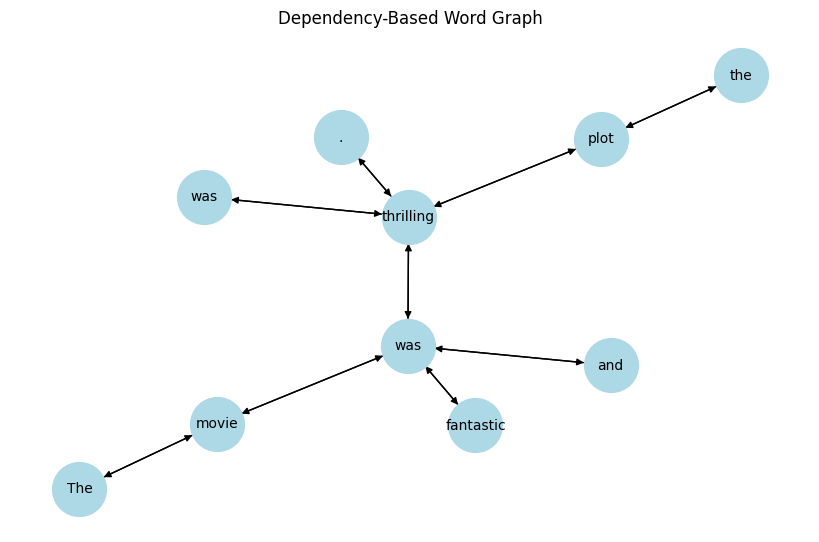

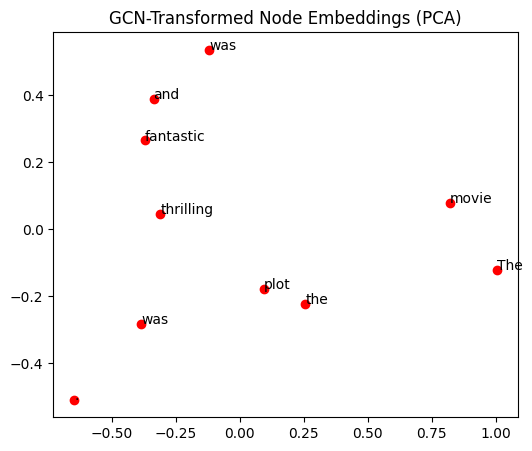

In [8]:
# Supervised Machine Learning models: Hier-GCNN, Fine-tuned BERT
import torch
import torch.nn as nn
import spacy
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Load SpaCy model (word vectors included)
nlp = spacy.load("en_core_web_sm")

# ========== 1. Create Dependency Graph ========== #
def sentence_to_graph(sentence):
    doc = nlp(sentence)
    edge_index = []
    x = []

    for token in doc:
        x.append(torch.tensor(token.vector))  # node features from SpaCy vector
        if token.head.i != token.i:
            edge_index.append([token.i, token.head.i])
            edge_index.append([token.head.i, token.i])

    x = torch.stack(x)
    edge_index = torch.tensor(edge_index).t().contiguous()  # [2, num_edges]
    batch = torch.zeros(x.size(0), dtype=torch.long)  # single graph, all nodes in batch 0
    return Data(x=x, edge_index=edge_index, batch=batch), doc

# ========== 2. Define Simple Hier-GCNN Model ========== #
class HierGCNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HierGCNN, self).__init__()
        self.gcn1 = GCNConv(input_dim, hidden_dim)
        self.gcn2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.gcn1(x, edge_index).relu()
        x = self.gcn2(x, edge_index).relu()
        return x  # node-level outputs

# ========== 3. Visualization: Graph Structure ========== #
def visualize_dependency_graph(doc, edge_index):
    G = nx.DiGraph()
    for i, token in enumerate(doc):
        G.add_node(i, label=token.text)
    for i, j in edge_index.t().tolist():
        G.add_edge(i, j)
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=1500, font_size=10)
    plt.title("Dependency-Based Word Graph")
    plt.show()

# ========== 4. Visualization: Embedding Space ========== #
def visualize_node_embeddings(x_out, doc):
    x_out = x_out.detach().numpy()
    x_reduced = PCA(n_components=2).fit_transform(x_out)
    plt.figure(figsize=(6, 5))
    plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c='red')
    for i, token in enumerate(doc):
        plt.annotate(token.text, (x_reduced[i, 0], x_reduced[i, 1]))
    plt.title("GCN-Transformed Node Embeddings (PCA)")
    plt.show()

# ========== 5. Run Everything ========== #
sentence = "The movie was fantastic and the plot was thrilling."
graph_data, doc = sentence_to_graph(sentence)

model = HierGCNN(input_dim=96, hidden_dim=64, output_dim=32)  # SpaCy en_core_web_sm = 96 dim
x_out = model(graph_data)

visualize_dependency_graph(doc, graph_data.edge_index)
visualize_node_embeddings(x_out, doc)
